In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier


In [2]:
dataset = pd.read_csv("data.csv")
dataset

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
dataset.shape


(1490, 3)

In [4]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [5]:
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [6]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]

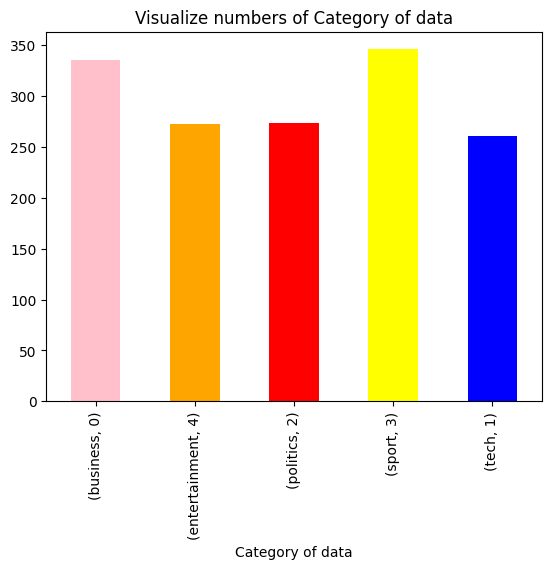

In [7]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visualize numbers of Category of data")
lemm = WordNetLemmatizer()
plt.show()

In [8]:
punctuation = string.punctuation
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ['say','however','could','would']
stop_updated.remove('not')
print(stop_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [9]:
def notdrop(words):    
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = 'not ' + word
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    return(new_words)

def clean_txtlemm(sent):
    sent = re.sub(r"\.",". ",sent)
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens1 = word_tokenize(sent.lower())
    sent = re.sub("n't","not ",sent)
    tokens = notdrop(tokens1)
    stemmed = [lemm.lemmatize(term, pos = 'v')  for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(stemmed)
    return res

dataset['clean_review'] = dataset.Text.apply(clean_txtlemm)
dataset   

,ArticleId,Text,Category,CategoryId,clean_review
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom ex boss launch defence lawyers defend...
1,154,german business confidence slides german busin...,business,0,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indicate economic gloom citizens majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,1,lifestyle govern mobile choice faster better f...
4,917,enron bosses in $168m payout eighteen former e...,business,0,enron boss 168m payout eighteen former enron d...
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,weak dollar hit reuters revenues media group r...
1488,1587,apple ipod family expands market apple has exp...,tech,1,apple ipod family expand market apple expand i...


business related words:


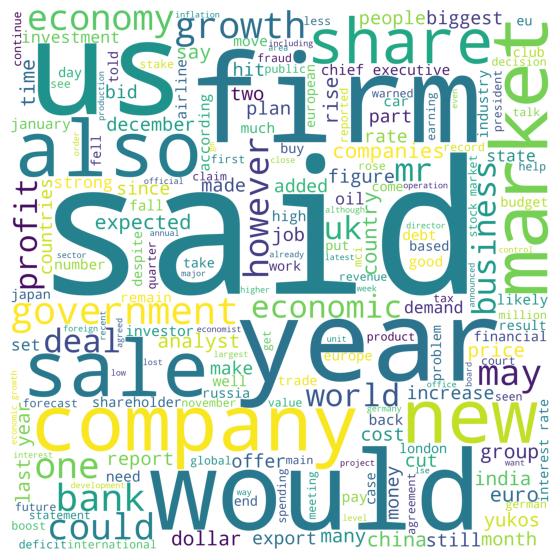

tech related words:


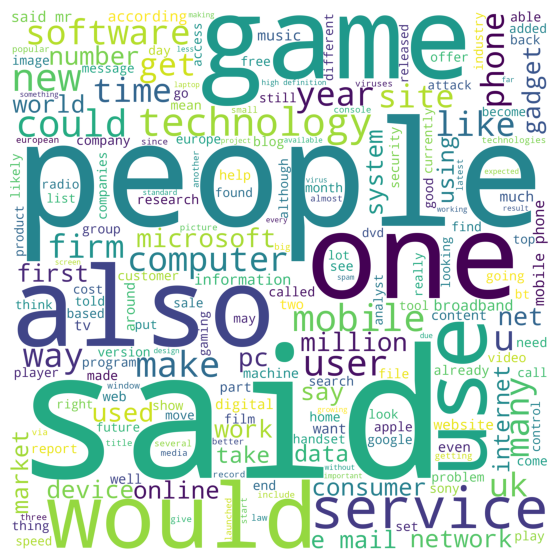

politics related words:


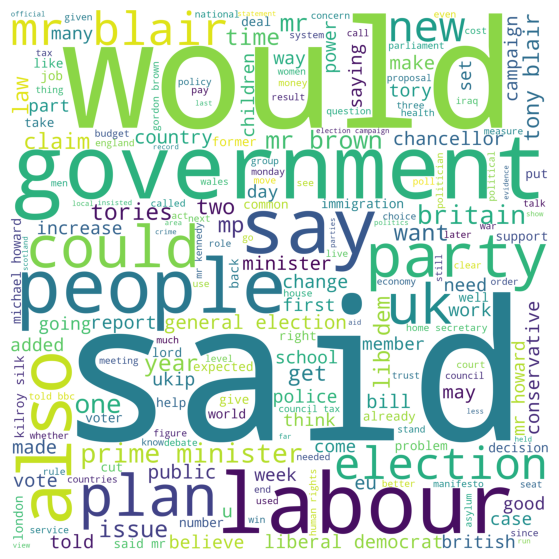

sport related words:


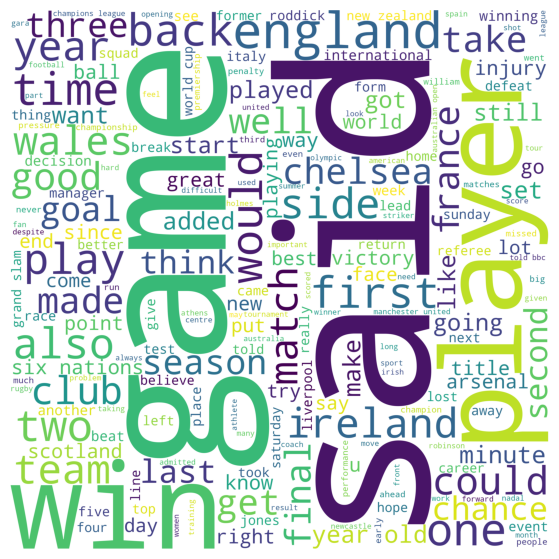

entertainment related words:


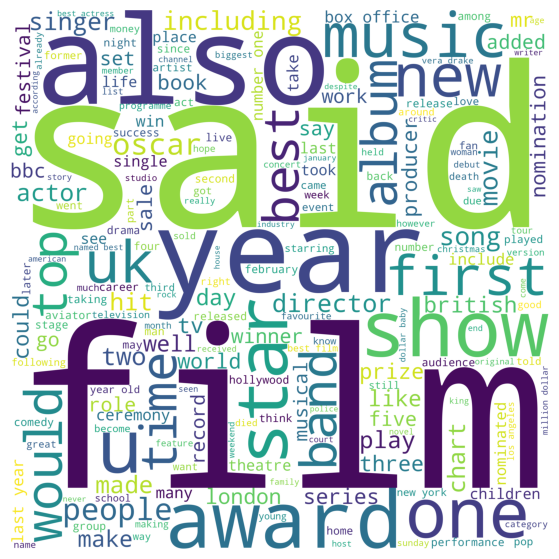

In [10]:

from wordcloud import WordCloud
stop = set(stopwords.words('english'))
business = dataset[dataset['CategoryId'] == 0]
business = business['Text']
tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']
politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']
sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']
entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
    if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop, background_color = color,  width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')
print("tech related words:")
wordcloud_draw(tech, 'white')
print("politics related words:")
wordcloud_draw(politics, 'white')
print("sport related words:")
wordcloud_draw(sport, 'white')
print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

In [11]:
x = dataset['clean_review']
y = dataset['CategoryId']

In [12]:
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
tfidf = TfidfVectorizer(max_features = 5000)
x = tfidf.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [14]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)



In [15]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro') 
print(f'Test Accuracy Score of Basic {LogisticRegression}: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}')

Test Accuracy Score of Basic <class 'sklearn.linear_model._logistic.LogisticRegression'>: % 97.32
Precision : 0.9731543624161074
Recall : 0.9731543624161074
F1-score : 0.9731543624161074
Confusion Matrix : 
 [[101   1   0   1   0]
 [  0  73   1   0   3]
 [  3   0  76   2   0]
 [  0   0   0  97   0]
 [  0   0   1   0  88]]


In [16]:
target_names = ['business', 'tech', 'politics', 'sport', 'entertainment']
print("\nclassification report")
print(classification_report(y_test, y_pred, target_names = target_names))


classification report
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       103
         tech       0.99      0.95      0.97        77
     politics       0.97      0.94      0.96        81
        sport       0.97      1.00      0.98        97
entertainment       0.97      0.99      0.98        89

     accuracy                           0.97       447
    macro avg       0.97      0.97      0.97       447
 weighted avg       0.97      0.97      0.97       447



In [17]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [18]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic {SVC}: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')
print(f'Cofusion Matrix : \n{confusion_matrix(y_test, y_pred)}')

Test Accuracy Score of Basic <class 'sklearn.svm._classes.SVC'>: % 97.76
Precision : 0.9776286353467561
Recall : 0.9776286353467561
F1-score : 0.9776286353467561
Cofusion Matrix : 
[[102   1   0   0   0]
 [  0  75   0   0   2]
 [  4   0  75   1   1]
 [  0   0   0  97   0]
 [  0   0   1   0  88]]


In [19]:
target_names = ['business', 'tech', 'politics', 'sport', 'entertainment']
print("\nclassification report")
print(classification_report(y_test, y_pred, target_names = target_names))


classification report
               precision    recall  f1-score   support

     business       0.96      0.99      0.98       103
         tech       0.99      0.97      0.98        77
     politics       0.99      0.93      0.96        81
        sport       0.99      1.00      0.99        97
entertainment       0.97      0.99      0.98        89

     accuracy                           0.98       447
    macro avg       0.98      0.98      0.98       447
 weighted avg       0.98      0.98      0.98       447

